### Direct Marketing Bagged Tree Classifier

To build a Bagged Tree and Random Forest classifier to classify customers as Good/Bad based on amount spent. Good - if amount spent is >average amount spent

In [64]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import os
os.getcwd()

'C:\\Users\\Varun R Bhat\\Downloads\\Jigsaw\\Direct_Marketing_Data_Set'

In [65]:
dm = pd.read_csv('directmarketing.csv',sep=',',header=0)
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [66]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Age            1000 non-null object
Gender         1000 non-null object
OwnHome        1000 non-null object
Married        1000 non-null object
Location       1000 non-null object
Salary         1000 non-null int64
Children       1000 non-null int64
History        697 non-null object
Catalogs       1000 non-null int64
AmountSpent    1000 non-null int64
Cust_Id        1000 non-null int64
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [67]:
# #--According to the marketer customer who spends more than the average spend is considered as Good--#
# Target variable
dm['Target'] = (dm.AmountSpent>dm.AmountSpent.mean()).map({True:1,False:0})
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151,1


In [68]:
# Missing values
dm.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
Target           0
dtype: int64

In [69]:
# Create separate category 'Missing' for History 
dm['History'] = dm.History.replace({np.nan:'Missing'})
print(dm.History.unique())
print(dm.isnull().sum())
dm.head()

['High' 'Low' 'Medium' 'Missing']
Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
Cust_Id        0
Target         0
dtype: int64


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151,1


In [70]:
# Converting Children and Catalogs into categorical variables
dm['Children'] = dm.Children.astype('category')
dm['Catalogs'] = dm.Catalogs.astype('category')
dm.dtypes

Age              object
Gender           object
OwnHome          object
Married          object
Location         object
Salary            int64
Children       category
History          object
Catalogs       category
AmountSpent       int64
Cust_Id           int64
Target            int64
dtype: object

In [71]:
# Target variable and Predictor variables
y = dm['Target']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [72]:
X = dm.drop(['History','AmountSpent','Cust_Id','Target'],axis=1)
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,Catalogs
0,Old,Female,Own,Single,Far,47500,0,6
1,Middle,Male,Rent,Single,Close,63600,0,6
2,Young,Female,Rent,Single,Close,13500,0,18
3,Middle,Male,Own,Married,Close,85600,1,18
4,Middle,Female,Own,Single,Close,68400,0,12


In [73]:
# Dummy variables
X = pd.get_dummies(X)
X.head()

,Salary,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,Children_0,Children_1,Children_2,Children_3,Catalogs_6,Catalogs_12,Catalogs_18,Catalogs_24
0,47500,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0
1,63600,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0
2,13500,0,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0
3,85600,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0
4,68400,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=200)

In [75]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [76]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=200,
                      base_estimator=DecisionTreeClassifier())

In [77]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [78]:
clf.oob_score_

0.8485714285714285

In [79]:
clf.score(X_test,y_test)

0.8333333333333334

In [80]:
# Alternative to K-fold CV
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=200,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

C:\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.84
************************
For n_estimators = 30
OOB score is 0.86
************************
For n_estimators = 50
OOB score is 0.8485714285714285
************************
For n_estimators = 70
OOB score is 0.8585714285714285
************************
For n_estimators = 90
OOB score is 0.8614285714285714
************************
For n_estimators = 110
OOB score is 0.8628571428571429
************************
For n_estimators = 130
OOB score is 0.8671428571428571
************************
For n_estimators = 150
OOB score is 0.8657142857142858
************************
For n_estimators = 170
OOB score is 0.8657142857142858
************************
For n_estimators = 190
OOB score is 0.8657142857142858
************************
For n_estimators = 210
OOB score is 0.8714285714285714
************************
For n_estimators = 230
OOB score is 0.87
************************
For n_estimators = 250
OOB score is 0.87
************************
For n_estimators = 27

In [81]:
#Finalizing on a tree model with 210 trees
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=210,random_state=200,
                      base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [82]:
clf.oob_score_

0.8714285714285714

In [83]:
clf.score(X_test,y_test)

0.8466666666666667

In [84]:
# AUC
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.9234949234949235

In [86]:
y_pred=clf.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[167,  22],
       [ 24,  87]], dtype=int64)

In [87]:
print(clf.estimators_[0].feature_importances_) #For 1st tree [0]

[0.56097105 0.00654608 0.00705985 0.01394976 0.0223918  0.01072715
 0.01098901 0.01426672 0.00790019 0.00198651 0.05915875 0.01551799
 0.03027108 0.04421545 0.         0.01812689 0.07447192 0.
 0.03603205 0.06541774]


In [88]:
# We can extract feature importance from each tree then take a mean for all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [89]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [90]:
feature_importance.sort_values(ascending=False)

Salary             0.597779
Catalogs_6         0.085337
Catalogs_24        0.036285
Location_Far       0.028498
Location_Close     0.027189
Children_2         0.026898
Catalogs_12        0.025690
Children_3         0.024020
Children_0         0.023069
Catalogs_18        0.018290
OwnHome_Own        0.014450
Children_1         0.014376
OwnHome_Rent       0.013845
Gender_Female      0.013683
Gender_Male        0.011752
Age_Young          0.009083
Age_Middle         0.008051
Age_Old            0.007626
Married_Married    0.007199
Married_Single     0.006882
dtype: float64

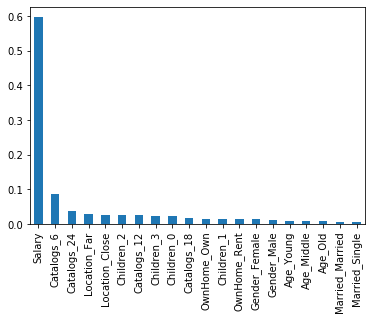

In [91]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

### Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
clf2 =RandomForestClassifier(n_estimators=20,oob_score=True,n_jobs=-1,random_state=200)

In [94]:
clf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=True, random_state=200, verbose=0,
                       warm_start=False)

In [95]:
clf2.oob_score_

0.8514285714285714

In [96]:
clf2.score(X_test,y_test)

0.8533333333333334

In [97]:
for w in range(10,300,20):
    clf2=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200)
    clf2.fit(X_train,y_train)
    oob=clf2.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.83
************************
For n_estimators = 30
OOB score is 0.8514285714285714
************************
For n_estimators = 50
OOB score is 0.86
************************
For n_estimators = 70
OOB score is 0.8657142857142858
************************
For n_estimators = 90
OOB score is 0.8571428571428571
************************
For n_estimators = 110
OOB score is 0.8614285714285714
************************
For n_estimators = 130
OOB score is 0.8585714285714285
************************
For n_estimators = 150
OOB score is 0.8557142857142858
************************
For n_estimators = 170
OOB score is 0.86
************************
For n_estimators = 190
OOB score is 0.86
************************
For n_estimators = 210
OOB score is 0.8614285714285714
************************
For n_estimators = 230
OOB score is 0.8628571428571429
************************
For n_estimators = 250
OOB score is 0.8628571428571429
************************
For n_estimators = 27

In [98]:
#Finalize 70 trees
clf2=RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=200)

In [99]:
clf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=True, random_state=200, verbose=0,
                       warm_start=False)

In [100]:
clf2.oob_score_

0.8657142857142858

In [101]:
clf2.score(X_test,y_test)

0.85

In [102]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf2.predict_proba(X_test)[:,1])

0.9195385862052529

In [103]:
y_pred2=clf2.predict(X_test)
metrics.confusion_matrix(y_test,y_pred2)

array([[166,  23],
       [ 22,  89]], dtype=int64)

In [104]:
clf2.feature_importances_

array([0.37391963, 0.0286608 , 0.01099948, 0.05257393, 0.02212959,
       0.02040225, 0.03074481, 0.0279698 , 0.04207689, 0.06357001,
       0.03098541, 0.02403725, 0.03326254, 0.02228187, 0.02394295,
       0.02396258, 0.07013288, 0.02307585, 0.02554734, 0.04972412])

In [105]:
imp_feat=pd.Series(clf2.feature_importances_,index=X.columns.tolist())

In [106]:
imp_feat.sort_values(ascending=False)

Salary             0.373920
Catalogs_6         0.070133
Married_Single     0.063570
Age_Young          0.052574
Catalogs_24        0.049724
Married_Married    0.042077
Children_0         0.033263
Location_Close     0.030985
OwnHome_Own        0.030745
Age_Middle         0.028661
OwnHome_Rent       0.027970
Catalogs_18        0.025547
Location_Far       0.024037
Children_3         0.023963
Children_2         0.023943
Catalogs_12        0.023076
Children_1         0.022282
Gender_Female      0.022130
Gender_Male        0.020402
Age_Old            0.010999
dtype: float64

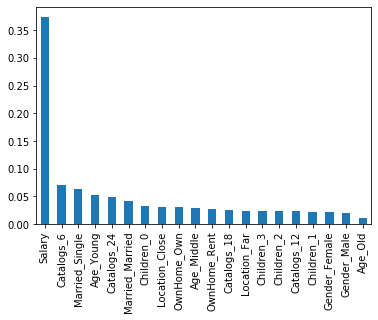

In [107]:
imp_feat.sort_values(ascending=False).plot(kind='bar')